In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing

import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

tv_shows = pd.read_csv('tv_shows.csv')
tv_shows.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [9]:
tv_shows.drop_duplicates(subset='Title',
                         keep='first',inplace=True)


In [11]:
import pandas as pd

# Fill NaN values and remove '%' from 'Rotten Tomatoes' column
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].fillna('0%')
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].apply(lambda x: str(x).rstrip('%'))

# Convert 'Rotten Tomatoes' to numeric, coercing errors to NaN, then fill NaN with 0
tv_shows['Rotten Tomatoes'] = pd.to_numeric(tv_shows['Rotten Tomatoes'], errors='coerce').fillna(0)

# Fill NaN values in 'IMDb' column, multiply by 10, and convert to integer, coercing errors to NaN, then fill NaN with 0
tv_shows['IMDb'] = tv_shows['IMDb'].fillna(0)
tv_shows['IMDb'] = pd.to_numeric(tv_shows['IMDb'], errors='coerce') * 10
tv_shows['IMDb'] = tv_shows['IMDb'].fillna(0).astype('int')

In [12]:
tv_shows_long=pd.melt(tv_shows[['Title','Netflix','Hulu','Disney+',
                                'Prime Video']],id_vars=['Title'],
                      var_name='StreamingOn', value_name='Present')
tv_shows_long = tv_shows_long[tv_shows_long['Present'] == 1]
tv_shows_long.drop(columns=['Present'],inplace=True)

In [15]:
# Ensure tv_shows_long and tv_shows are defined and contain the 'Title' column
# Example:
# tv_shows_long = pd.DataFrame({'Title': ['Show1', 'Show2'], 'OtherColumn': [1, 2]})
# tv_shows = pd.DataFrame({'Title': ['Show1', 'Show2'], 'Netflix': [1, 0], 'Hulu': [0, 1], 'Prime Video': [1, 1], 'Disney+': [0, 0], 'type': ['A', 'B'], 'Unnamed: 0': [0, 1]})

# Merge the DataFrames
v_shows_combined = tv_shows_long.merge(tv_shows, on='Title', how='inner')

# List of columns to drop
columns_to_drop = ['Unnamed: 0', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'type']

# Drop the specified columns if they exist
v_shows_combined.drop(columns=[col for col in columns_to_drop if col in v_shows_combined.columns], inplace=True)

<Axes: xlabel='StreamingOn'>

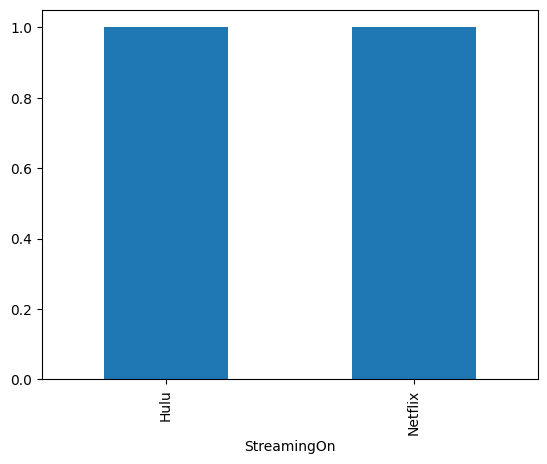

In [17]:
import pandas as pd

# Example DataFrames (replace with actual data)
tv_shows_long = pd.DataFrame({'Title': ['Show1', 'Show2'], 'OtherColumn': [1, 2]})
tv_shows = pd.DataFrame({
    'Title': ['Show1', 'Show2'],
    'Netflix': [1, 0],
    'Hulu': [0, 1],
    'Prime Video': [1, 1],
    'Disney+': [0, 0],
    'type': ['A', 'B'],
    'Unnamed: 0': [0, 1],
    'IMDb': [7.5, 8.0],
    'Rotten Tomatoes': [85, 90],
    'StreamingOn': ['Netflix', 'Hulu']
})

# Merge the DataFrames
tv_shows_combined = tv_shows_long.merge(tv_shows, on='Title', how='inner')

# List of columns to drop
columns_to_drop = ['Unnamed: 0', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'type']

# Drop the specified columns if they exist
tv_shows_combined.drop(columns=[col for col in columns_to_drop if col in tv_shows_combined.columns], inplace=True)

# Filter tv_shows_combined for both ratings
tv_shows_both_ratings = tv_shows_combined[(tv_shows_combined.IMDb > 0) & (tv_shows_combined['Rotten Tomatoes'] > 0)]

# Plot the count of titles grouped by 'StreamingOn'
tv_shows_combined.groupby('StreamingOn').Title.count().plot(kind='bar')

In [19]:
import plotly.express as px
from plotly.subplots import make_subplots

# Create violin plots
figure = []
figure.append(px.violin(tv_shows_both_ratings, x='StreamingOn', y='IMDb', color='StreamingOn'))
figure.append(px.violin(tv_shows_both_ratings, x='StreamingOn', y='Rotten Tomatoes', color='StreamingOn'))

# Create subplots with 2 rows and 1 column
fig = make_subplots(rows=2, cols=1, shared_yaxes=True)

# Add traces to the subplots
for i in range(2):
    for trace in figure[i]['data']:
        fig.add_trace(trace, row=i+1, col=1)

# Update layout
fig.update_layout(autosize=False, width=800, height=800)

# Show the figure
fig.show()

In [20]:
px.scatter(tv_shows_both_ratings, x='IMDb',
           y='Rotten Tomatoes',color='StreamingOn')